In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

In [2]:
n = 20

df1 = pd.read_csv('A2058_Bayesian.csv')[:n]



In [3]:
df1.reset_index(drop=True,inplace=True)
df1 = df1[df1.columns[1:]]



In [4]:
y = sum([df1.loc[x].values.tolist() for x in range(len(df1))],[])

In [5]:
X = np.linspace(np.log10(0.045),np.log10(10), len(df1.columns)).tolist()*len(df1)

In [6]:
df = pd.DataFrame({'y':y,'X':X })

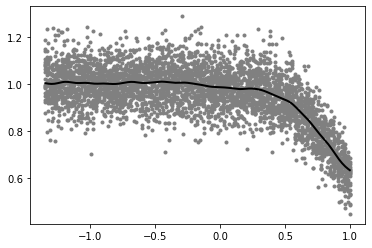

In [7]:
h= 0.05

fig, ax = plt.subplots(1, 1)
ax.plot(df.X, df.y, 'o', color='grey',markersize=3)

#NW
ax.plot(np.linspace(np.log10(0.045),np.log10(10), len(df1.columns)),[nw(h,t,X,y) for t in np.linspace(np.log10(0.045),np.log10(10), len(df1.columns))],color= 'black', lw=2)



In [8]:
m_hat_nw = [nw(h,t,df.X,df.y) for t in df.X ]


In [9]:
r_hat = [(Y-mx)**2 for Y,mx in zip(y,m_hat_nw)]




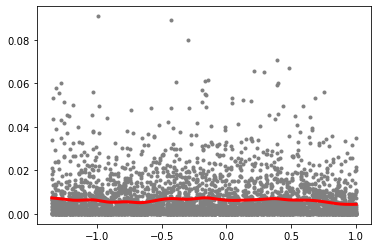

In [17]:
h=0.07

fig, ax = plt.subplots(1, 1)
ax.plot(df.X,r_hat,'o',color='grey',markersize=3)

ax.plot(np.linspace(np.log10(0.045),np.log10(10), len(df1.columns)),[sigma_res(h,t,df.X,r_hat)**2 for t in np.linspace(np.log10(0.045),np.log10(10), len(df1.columns))],color= 'red', lw=3)


#ax.set_ylim(0,0.01)

In [18]:
diff = []
for i in range(1,len(y)):
        diff.append(((y[i-1]-y[i])**2)/2)

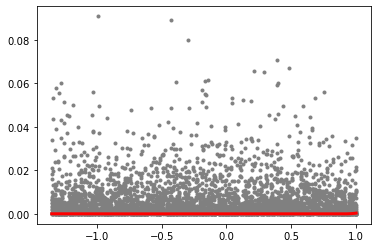

In [20]:
h1=0.05
fig, ax = plt.subplots(1, 1)
ax.plot(X,r_hat,'o',color='grey',markersize=3)

#ax.set_ylim(0,0.0002)
ax.plot(np.linspace(np.log10(0.045),np.log10(10), len(df1.columns)), [nw(h1,t,df.X[:(len(X)-1)],diff)**2 for t in np.linspace(np.log10(0.045),np.log10(10), len(df1.columns))],'-g',color= 'red', lw=3)